In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [128]:
df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_airbnb.head()

,latitude,longitude,neighbourhood,property_type,room_type,bedrooms,cleaning_fee,security_deposit,Free_parking_on_premises,extra_people,...,Crib,Washer,Dishwasher,Suitable_for_events,property_type.1,Full_kitchen,Internet,Bathtub,Cable_TV,price
id,,,,,,,,,,,,,,,,,,,,,
17878,-22.96592,-43.17896,Copacabana,Condominium,Entire home/apt,2.0,378.0,0.0,0,63.0,...,0,0,0,1,Condominium,0,1,0,1,332.0
25026,-22.97712,-43.19045,Copacabana,Apartment,Entire home/apt,1.0,250.0,1000.0,0,45.0,...,0,0,0,0,Apartment,0,1,0,1,160.0
31560,-22.98302,-43.21427,Ipanema,Apartment,Entire home/apt,1.0,84.0,0.0,0,42.0,...,0,0,0,0,Apartment,0,1,0,1,273.0
35636,-22.98816,-43.19359,Ipanema,Apartment,Entire home/apt,1.0,172.0,1050.0,0,63.0,...,0,1,0,0,Apartment,0,1,0,1,378.0
35764,-22.98127,-43.19046,Copacabana,Loft,Entire home/apt,1.0,140.0,400.0,0,80.0,...,0,0,0,0,Loft,0,0,0,1,130.0


In [129]:
# Mapa de calor - Concentração de anúncios por bairros

m=folium.Map([-22.92538,-43.29582],zoom_start=12)
HeatMap(df_airbnb[['latitude','longitude']],radius=8,gradient={0.25:'blue',0.5:'purple',0.75:'orange',1.0:'red'}).add_to(m)
display(m)

Text(0.5, 0, 'Média de preço por bairro')

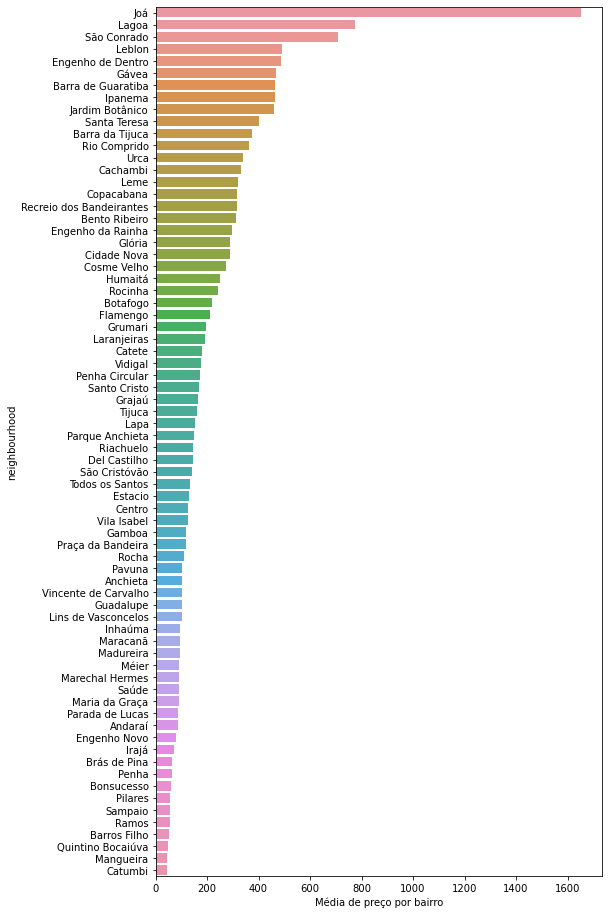

In [130]:
# Exibindo a média de preços dos anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].mean())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Média de preço por bairro')

Text(0.5, 0, 'Contagem de anúncios por bairro')

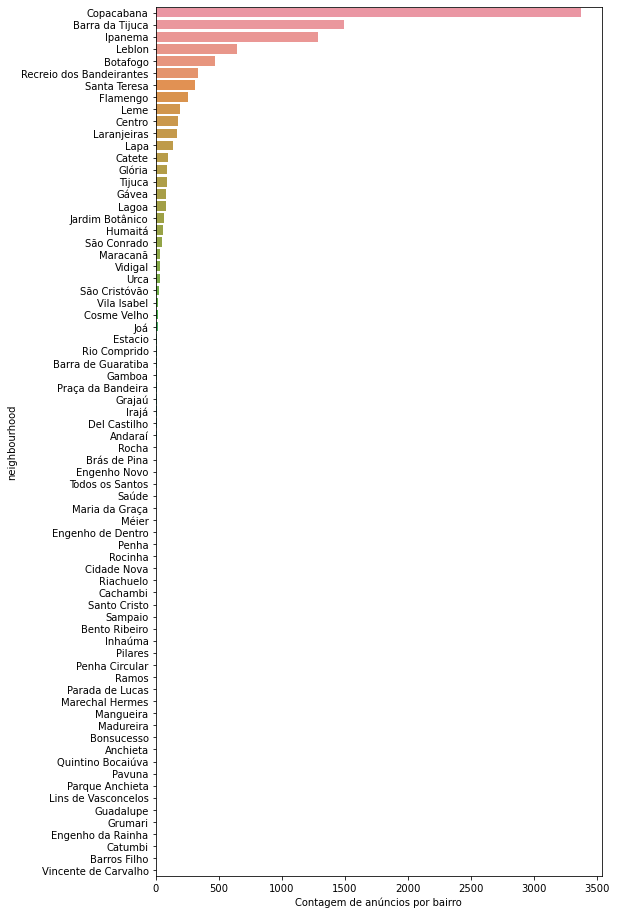

In [131]:
# Exibindo a contagem de anúncios por bairro

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].count())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Contagem de anúncios por bairro')

In [132]:
# O bairro do Joá produziu uma distorção nas estatísticas, pois possui poucos anúncios, porém com uma média de valores bastante alta.
# Além disso, observamos uma grande quantidade de bairros com poucos anúncios, o que poderia causar distorções semelhantes.
# Outros exemplos: Barra de Guaratiba, Rio Comprido e Bento Ribeiro.
# Pelo conhecimento do negócio, é sabido que essas regiões não possuem um valor condizente com suas respectivas médias.
# Portanto, decidiremos por analisar apenas 25% dos bairros com a maior quantidade de anúncios, para evitar esse tipo de distorção.

bairros_validos = df_plot['neighbourhood'].head(int(len(df_plot)*(0.25))).to_list()
bairros_validos

['Copacabana',
 'Barra da Tijuca',
 'Ipanema',
 'Leblon',
 'Botafogo',
 'Recreio dos Bandeirantes',
 'Santa Teresa',
 'Flamengo',
 'Leme',
 'Centro',
 'Laranjeiras',
 'Lapa',
 'Catete',
 'Glória',
 'Tijuca',
 'Gávea',
 'Lagoa',
 'Jardim Botânico']

In [133]:
# Aplicando o filtro no dataframe

df_airbnb = df_airbnb[df_airbnb['neighbourhood'].isin(bairros_validos)]
df_airbnb.shape

(9364, 26)

In [134]:
df_airbnb.describe()

,latitude,longitude,bedrooms,cleaning_fee,security_deposit,Free_parking_on_premises,extra_people,Pool,Dryer,m2,...,Air_conditioning,Crib,Washer,Dishwasher,Suitable_for_events,Full_kitchen,Internet,Bathtub,Cable_TV,price
count,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,...,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000
mean,-22.972215,-43.229913,1.570589,148.193614,659.759398,0.320162,53.038659,0.241670,0.184003,12967.549124,...,0.870034,0.025737,0.637441,0.042183,0.051153,0.006194,0.343550,0.021892,0.532678,348.061726
std,0.025245,0.080950,0.993213,101.203902,1360.006355,0.466564,85.635426,0.428118,0.387507,4943.852065,...,0.336284,0.158358,0.480765,0.201017,0.220322,0.078462,0.474918,0.146340,0.498958,669.020077
min,-23.032630,-43.523750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3276.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-22.984630,-43.222552,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9335.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000
50%,-22.976015,-43.192110,1.000000,150.000000,400.000000,0.000000,39.000000,0.000000,0.000000,12170.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,218.000000
75%,-22.963830,-43.184595,2.000000,195.000000,800.000000,1.000000,70.000000,0.000000,0.000000,12210.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,369.000000
max,-22.896090,-43.164160,15.000000,1469.000000,20991.000000,1.000000,1259.000000,1.000000,1.000000,23626.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31398.000000


Text(0.5, 0, 'Média de preço por bairro')

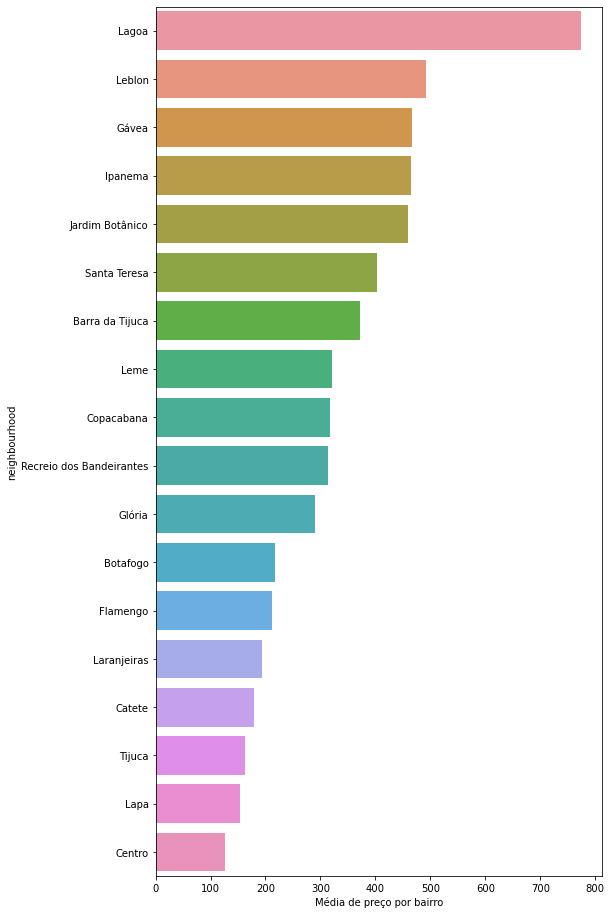

In [135]:
# Exibindo a média de preços dos anúncios por bairro - apenas com os bairros com mais anúncios

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].mean())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
df_plot = df_plot[df_plot['neighbourhood'].isin(bairros_validos)]
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Média de preço por bairro')

Text(0.5, 0, 'Contagem de anúncios por bairro')

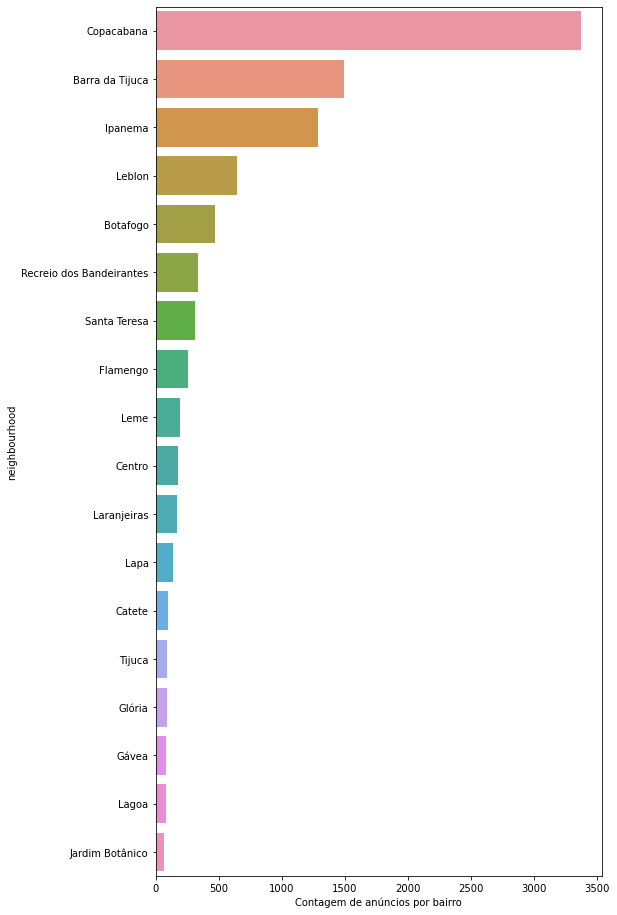

In [136]:
# Exibindo a contagem de anúncios por bairro - apenas com os bairros com mais anúncios

df_plot = pd.DataFrame(data=df_airbnb.groupby("neighbourhood")["price"].count())
df_plot.sort_values(by="price", ascending=False, inplace=True)
df_plot.reset_index(inplace=True)
df_plot = df_plot[df_plot['neighbourhood'].isin(bairros_validos)]
plt.figure(figsize=(8, 16))
ax = sns.barplot(y='neighbourhood', x='price', data=df_plot)
ax.set_xlabel('Contagem de anúncios por bairro')

In [137]:
df_properties_statistics = pd.DataFrame(data=df_airbnb.groupby("property_type")["price"].count())
df_properties_statistics.sort_values(by="price", ascending=False, inplace=True)
df_properties_statistics

,price
property_type,
Apartment,7423
Condominium,658
House,379
Serviced apartment,348
Loft,253
Guest suite,55
Guesthouse,46
Aparthotel,42
Bed and breakfast,33


In [138]:
tipos_de_propriedades_validas = df_properties_statistics.head(int(len(df_properties_statistics)*(0.5)))
df_plot = pd.DataFrame({"property_type":tipos_de_propriedades_validas.index.to_list(), "count":tipos_de_propriedades_validas.price.to_list()})
df_plot.set_index("property_type", inplace = True)
df_plot.sort_values(by="count", ascending=True, inplace=True)

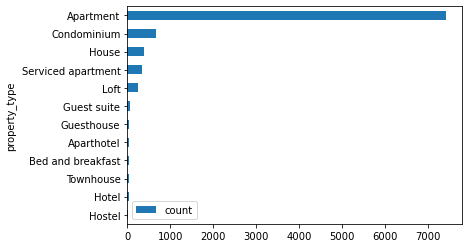

In [139]:
df_plot.plot.barh()

In [140]:
# Aplicando o filtro de tipos de propriedades no dataframe

df_airbnb = df_airbnb[df_airbnb['property_type'].isin(tipos_de_propriedades_validas.index.to_list())]
df_airbnb.shape

(9311, 26)

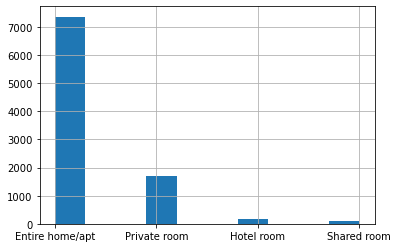

In [141]:
df_airbnb['room_type'].hist()

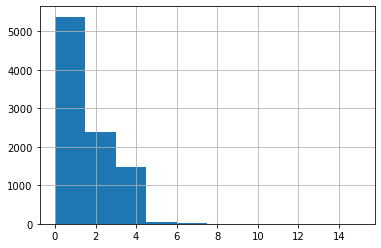

In [142]:
df_airbnb['bedrooms'].hist()